## Q-learning

In [1]:
! pip install gymnasium[atari] AutoROM
! pip install autorom[accept-rom-license]
! pip install shimmy

In [2]:
!AutoROM --accept-license
import gymnasium as gym
import ale_py
import shimmy
import numpy as np

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	C:\Users\fSIoF\anaconda3\envs\rl\Lib\site-packages\AutoROM\roms

Existing ROMs will be overwritten.


In [3]:
if __name__ == '__main__':
    env = gym.make("Taxi-v3")
    env.reset()

In [15]:
epochs = 0

frames = []  # for animation
done = False

#env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
env = gym.make("Taxi-v3", render_mode="rgb_array")
observation, info = env.reset()

while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    # Put each rendered frame into dict for animation
    frames.append(
        {
            "frame": env.render(),
            "state": observation,
            "action": action,
            "reward": reward,
        }
    )

    epochs += 1
    if epochs == 1000:
        break

In [16]:
!pip install moviepy
!pip install matplotlib
!pip install imageio

In [17]:
from moviepy import ImageSequenceClip
# !pip install moviepy - if you don’t have moviepy

def create_gif(frames: dict, filename, fps=100):
    """
    Creates a GIF animation from a list of RGBA NumPy arrays.

    Args:
        frames: A list of RGBA NumPy arrays representing the animation frames.
        filename: The output filename for the GIF animation.
        fps: The frames per second of the animation (default: 10).
    """
    rgba_frames = [frame["frame"] for frame in frames]

    clip = ImageSequenceClip(rgba_frames, fps=fps)
    clip.write_gif(filename, fps=fps)

# Example usage
create_gif(frames, "animation.gif") #saves the GIF locally

MoviePy - Building file animation.gif with imageio.


In [7]:
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample()) # display a random observation

Observation Space Discrete(500)
Sample observation 83


In [8]:
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample())

Action Space Shape 6
Action Space Sample 5


### Setting parameters of the agent

In [10]:

alpha = 0.1       # Learning rate
gamma = 0.9       # Discount factor
epsilon = 0.1     # Exploration rate
epsilon_decay = 0.99  # Decay rate for epsilon
episodes = 2000   # Number of training episodes

### Initialize the Q-table

In [11]:
# Initialize the Q-Table with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

### Training the agent

In [12]:
# List to store total rewards per episode
reward_list = []
# Reduce epsilon over time
epsilon_decay = 0.99

# Training the agent
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_rewards = 0  # Track total rewards for this episode

    while not done:
        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Take the action, observe reward and next state
        next_state, reward, done, truncated, _ = env.step(action)
        total_rewards += reward

        # Q-Learning update
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        # Move to the next state
        state = next_state

    # Decay epsilon after each episode
    epsilon *= epsilon_decay

    # Append total rewards for this episode to the reward list
    reward_list.append(total_rewards)

In [18]:
import time
import imageio

# Reset the environment for a new episode
state, _ = env.reset()
done = False
total_rewards = 0
# Store frames for the GIF

print("\nTesting the agent's performance:")

while not done:
    # Select the action with the highest Q-value for the current state
    action = np.argmax(Q[state]) if state in Q else env.action_space.sample()

    # Take the action and observe the results
    next_state, reward, done, truncated, _ = env.step(action)
    total_rewards += reward

    # Render the environment (ensure compatibility with text rendering)
    env.render()
    #time.sleep(0.1)  # Add a slight delay for better visualization

    # Move to the next state
    state = next_state

# Close the environment
env.close()

print(f"Total Rewards: {total_rewards}")



Testing the agent's performance:
Total Rewards: -18081


### Plotting the results

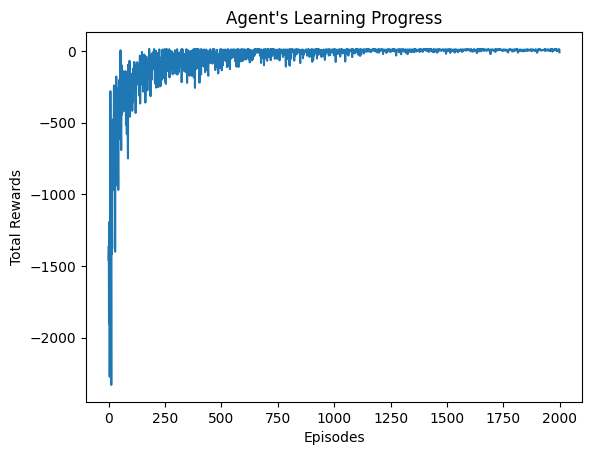

In [19]:
import matplotlib.pyplot as plt

# Plot total rewards per episode
plt.plot(reward_list)
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Agent's Learning Progress")
plt.show()


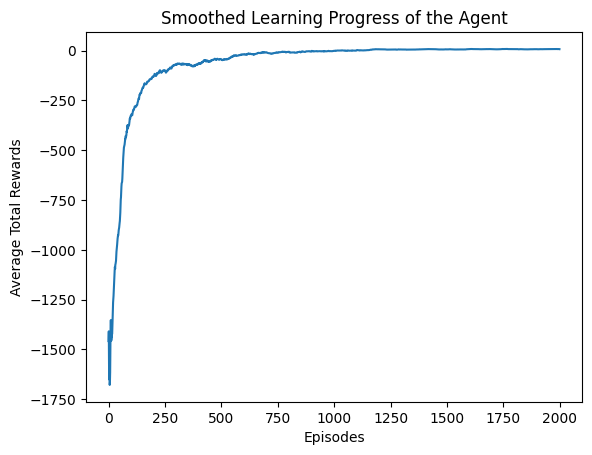

In [20]:
# Smoothing the curve with a rolling average
window_size = 50
smoothed_rewards = [np.mean(reward_list[i-window_size:i+1]) if i >= window_size else np.mean(reward_list[:i+1]) for i in range(len(reward_list))]

plt.plot(smoothed_rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Total Rewards")
plt.title("Smoothed Learning Progress of the Agent")
plt.show()